In [5]:
# Importamos los modulos que nos van a ayudar en el análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Personalmente me gusta usar el estilo "fivethirtyeight", por lo que será el que voy a utilizar durante el análisis
plt.style.use("fivethirtyeight")

In [6]:
# Importamos el archivo csv en la variable netflix y vemos tanto los resultados de head() como tail()
netflix = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\archivos csv\netflix1.csv")
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [7]:
# Analizamos tipo de datos de las columnas y la existencia de valores nulos
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
# Cambiar "date_added" de tipo de dato a datetime para futuro analisis
netflix["date_added"] = pd.to_datetime(netflix["date_added"])
# Verificar el cambio
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [9]:
# Quiero ver que tipos de contenido tiene netflix
tp = netflix["type"].value_counts()
tp

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

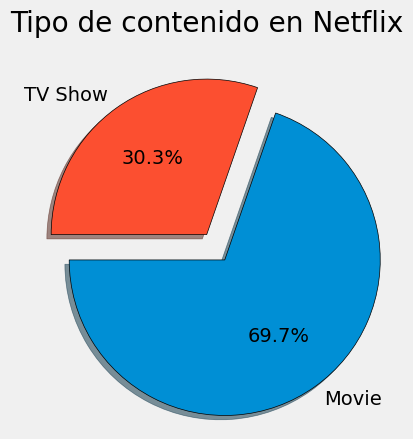

In [10]:
# Como "type" posee 2 valores, podemos ver facilmente la distribucion de los datos con un gráfico de torta
a = [0.2, 0]
plt.pie(x=tp, labels=tp.index, autopct="%1.1f%%", startangle=180, shadow=True, explode=a, wedgeprops={"edgecolor":"black"})
plt.title("Tipo de contenido en Netflix")

plt.show()

In [11]:
# Obtener los 10 paises con mayor cantidad de instancias en los tipos de conteo
cont = netflix.groupby(["country", "type"]).size().unstack().reset_index()
cont["total"] = cont["Movie"] + cont["TV Show"]
cont.sort_values(by="total", ascending=False, inplace=True)
cont_filtrado = cont[cont["country"] != "Not Given"]
cont_filtrado = cont_filtrado.head(10).sort_values(by="total")

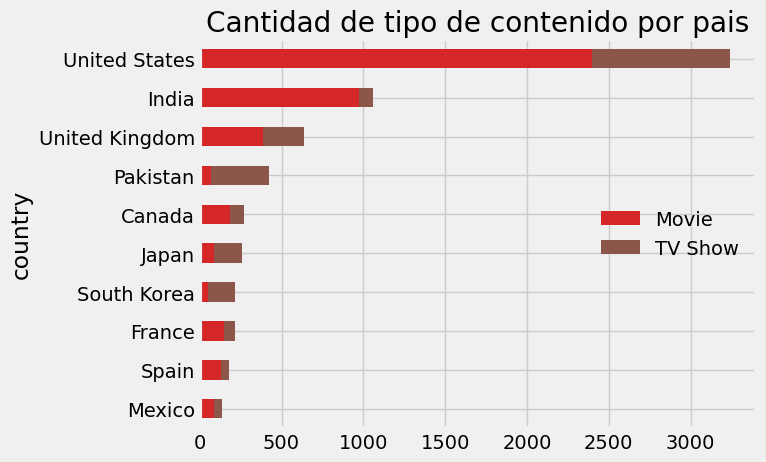

In [12]:
# Grafico de los 10 paises con mayor cantidad de instancias en los tipos de conteo
cont_filtrado.set_index('country')[['Movie', 'TV Show']].plot(kind='barh', stacked=True, color=['#d62728', '#8c564b'])
plt.title("Cantidad de tipo de contenido por pais")

plt.legend(frameon=False, loc="right")
plt.show()

In [13]:
# Realizamos un conteo de la cantidad de películas/series lanzadas por año
años = netflix.groupby(netflix["date_added"].dt.year)["type"].count().reset_index()
años

,date_added,type
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,426
9,2017,1185


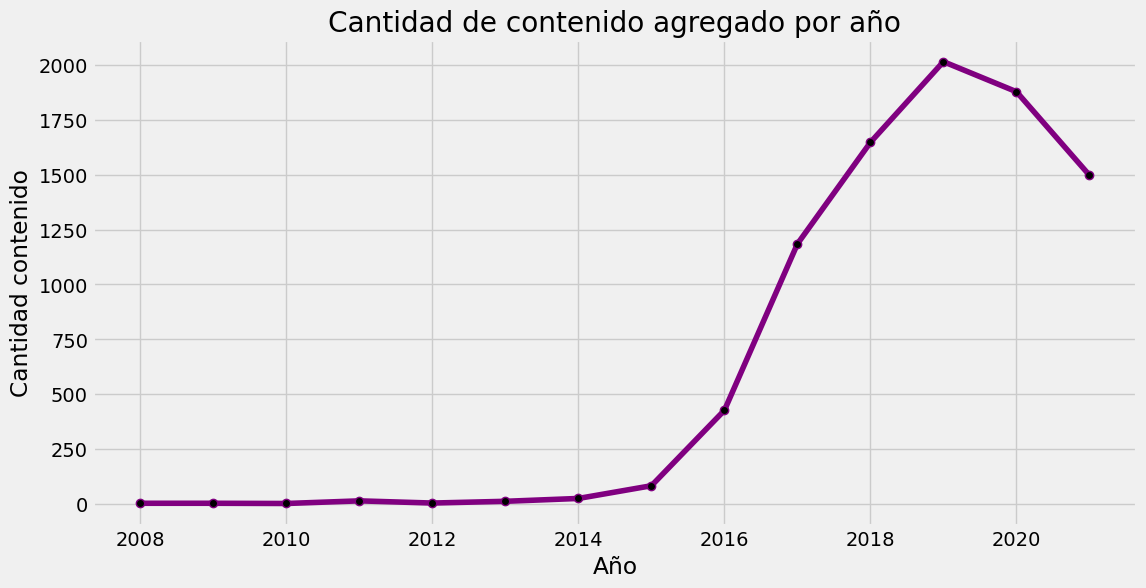

In [14]:
# Graficar la evolución a través de los años del contenido agregado total anual
años.plot(kind="line", x="date_added", y="type", color="purple", marker="o", markerfacecolor="black", legend=False, figsize=(12, 6))
plt.title("Cantidad de contenido agregado por año")
plt.xlabel("Año")
plt.ylabel("Cantidad contenido")

plt.show()

In [15]:
# 10 directores con más películas y series en netflix
directores = netflix.groupby("director")["type"].count().reset_index()
directores.sort_values(by="type", ascending=False, inplace=True)
filter_directores = directores[directores["director"] != "Not Given"].head(10)
filter_directores.sort_values(by="type", inplace=True)

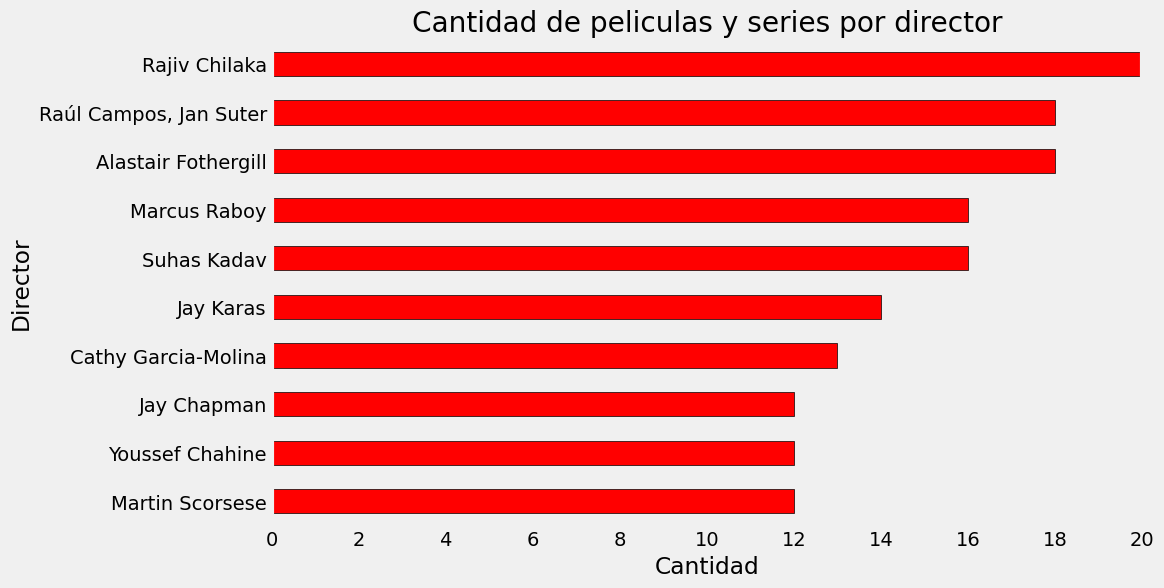

In [16]:
# Graficar los 10 directores con más películas y series
filter_directores.set_index("director")["type"].plot(kind="barh", color="red", figsize=(10, 6), edgecolor="black")
plt.title("Cantidad de peliculas y series por director")
plt.xlabel("Cantidad")
plt.ylabel("Director")
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.grid(False)

plt.show()

In [17]:
# Buscar los 10 géneros más ocurrentes
genres = netflix.groupby("listed_in")["type"].count().reset_index()
genres.sort_values(by="type", ascending=False, inplace=True)
genres = genres.head(10)
genres.sort_values(by="type", inplace=True)

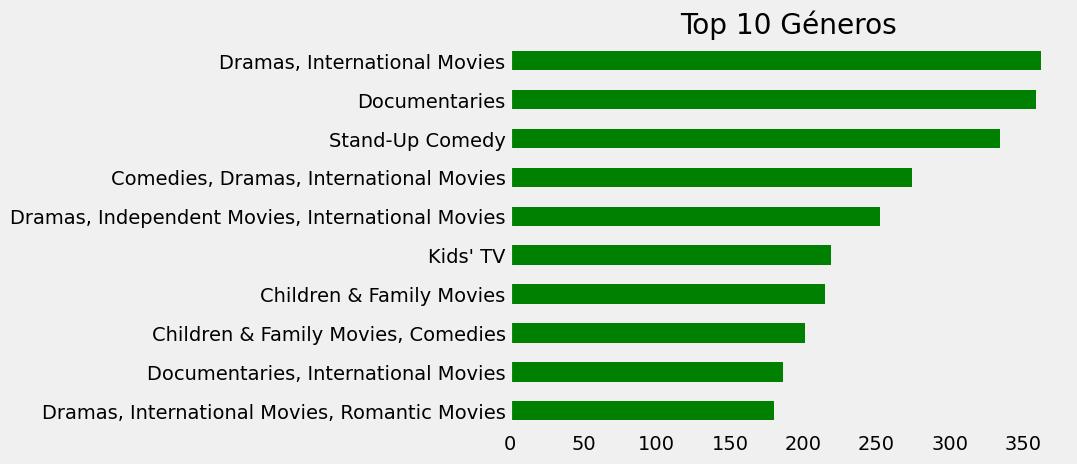

In [18]:
# Graficar los 10 géneros más ocurrentes
genres.set_index("listed_in")["type"].plot(kind="barh", color="green")
plt.title("Top 10 Géneros")
plt.ylabel(None)
plt.grid(False)

plt.show()

In [19]:
# Encontrar los 10 ratings más ocurrentes
t_ratings = netflix.groupby("rating")["type"].count().reset_index()
t_ratings.sort_values(by="type", ascending=False, inplace=True)
t_ratings = t_ratings.head(10)

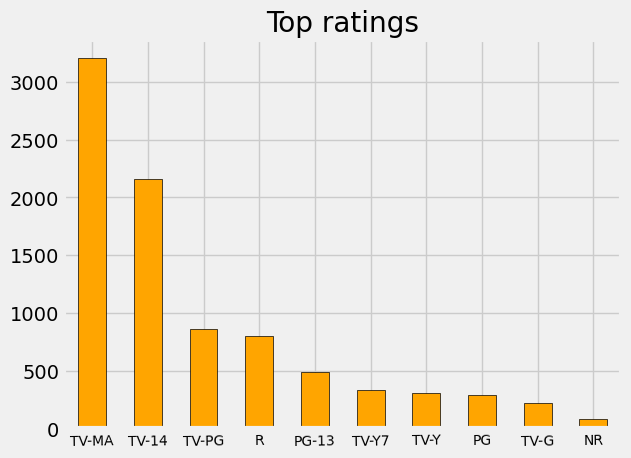

In [20]:
# Graficar los 10 géneros más ocurrentes
t_ratings.set_index("rating")["type"].plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top ratings")
# Rotamos y achicamos los valores de x para mejor legibilidad
plt.xticks(rotation=1, fontsize=10)
# Sabemos de que estamos hablando, por lo que dejar que en x hablamos de ratings seria redundante
plt.xlabel(None)


plt.show()

In [21]:
# Buscamos las 10 películas/shows más antiguas
oldest_ten = netflix.loc[:, ("title", "release_year")].sort_values(by="release_year").head(10)
oldest_ten

,title,release_year
421,Pioneers: First Women Filmmakers*,1925
5698,Prelude to War,1942
6037,The Battle of Midway,1942
6510,WWII: Report from the Aleutians,1943
6422,Undercover: How to Operate Behind Enemy Lines,1943
6491,Why We Fight: The Battle of Russia,1943
6230,The Negro Soldier,1944
6218,The Memphis Belle: A Story of a\nFlying Fortress,1944
6406,Tunisian Victory,1944
6874,Five Came Back: The Reference Films,1945


In [22]:
# Antes filtramos por la cantidad total de contenido, ahora distinguimos películas de shows
contenidos = netflix.groupby(netflix["date_added"].dt.year)["type"].value_counts().reset_index()
contenidos

,date_added,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


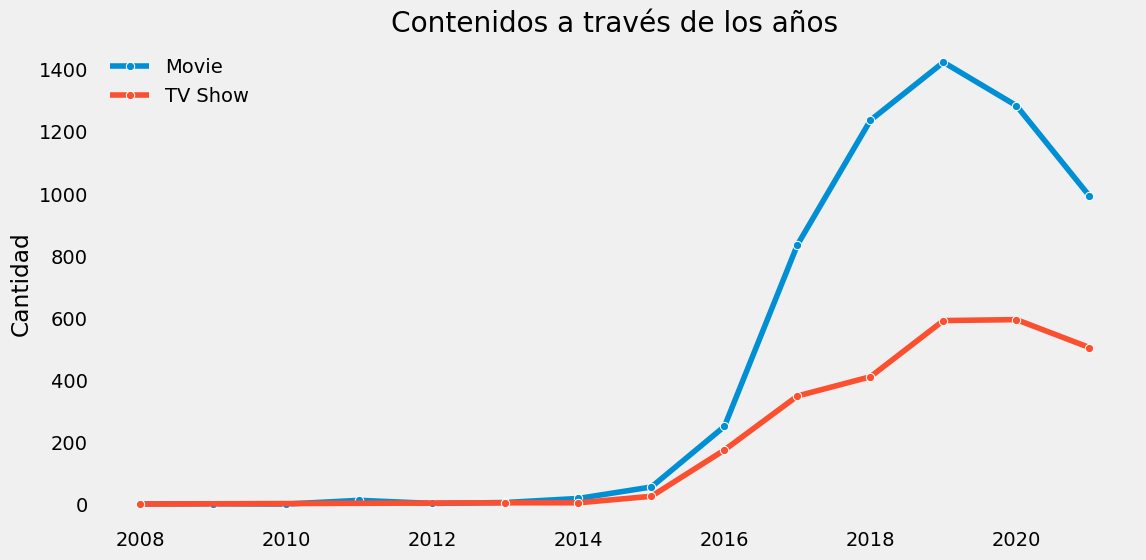

In [32]:
# Graficamos la evolución tanto de la cantidad de películas como de shows
plt.figure(figsize=(12, 6))
sns.lineplot(data=contenidos, x="date_added", y="count", hue="type", marker="o")
plt.title("Contenidos a través de los años")
plt.xlabel(None)
plt.ylabel("Cantidad")

plt.legend(frameon=False)

plt.grid(False)

plt.show()  

In [24]:
# Queremos ver cuales son los 5 paises con más películas y shows agregados
type_count = netflix.pivot_table(index="country", columns=netflix["type"], values="type", aggfunc="count")\
.sort_values("Movie", ascending=False)
# Vemos que existe un valor no dado por lo que no lo incluimos para el gráfico
top_five_count = type_count[type_count.index != "Not Given"].head()

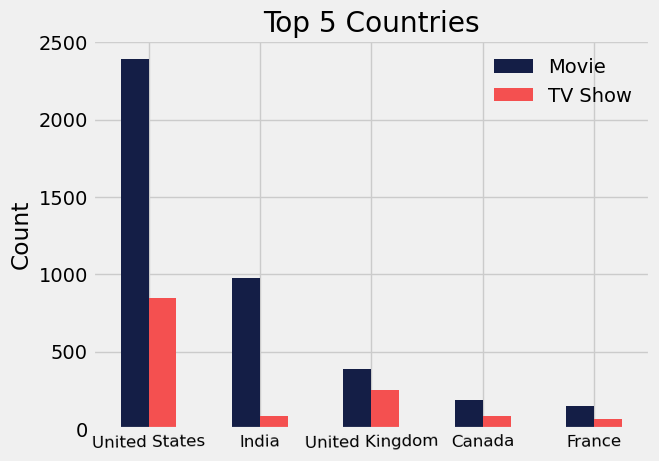

In [33]:
# Graficamos
top_five_count.plot(kind="bar", color=["#141E46", "#F45050"])
plt.title("Top 5 Countries")
plt.xlabel(None)
plt.ylabel("Count")
plt.xticks(rotation=1, fontsize=12)

plt.legend(frameon=False)

plt.show()

In [26]:
# Queremos ver el promedio de duración de las películas por año
a = netflix[netflix["type"] == "Movie"]
a["duration"] = a["duration"].str.replace(" min", "")
a["duration"] = pd.to_numeric(a["duration"])
# Además del promedio, también realizamos un conteo de la cantidad de películas
b = a.groupby(a["date_added"].dt.year)["duration"].agg(["count", "mean"]).apply("round")
b

C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_1896\3498887437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["duration"] = a["duration"].str.replace(" min", "")
C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_1896\3498887437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["duration"] = pd.to_numeric(a["duration"])


,count,mean
date_added,,
2008,1,81.0
2009,2,66.0
2010,1,84.0
2011,13,93.0
2012,3,62.0
2013,6,84.0
2014,19,77.0
2015,56,84.0
2016,251,84.0


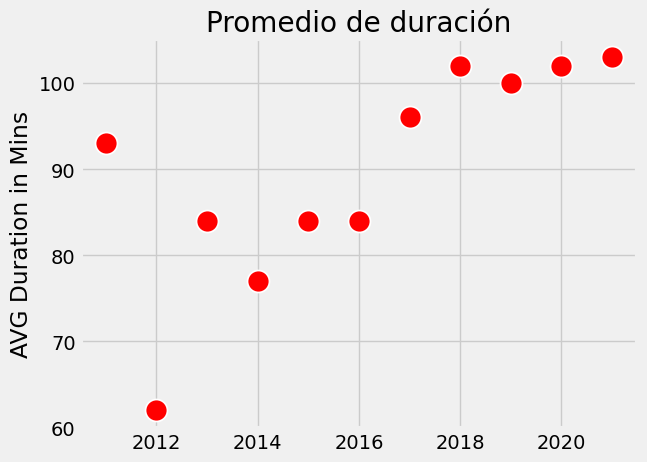

In [ ]:
# Como vimos, hay pocas ocurrencias en los años anteriores a 2011, por lo que no son incluídos
b = b[b.index > 2010]
sns.scatterplot(data=b, x=b.index, y="mean", color="red", s=250)
plt.title("Promedio de duración")
plt.xlabel(None)
plt.ylabel("AVG Duration in Mins")

plt.show()

In [28]:
# Buscamos las 10 categorias más ocurrentes
categories = netflix["listed_in"].str.split(", ")
categories

0                                         [Documentaries]
1       [Crime TV Shows, International TV Shows, TV Ac...
2                    [TV Dramas, TV Horror, TV Mysteries]
3                    [Children & Family Movies, Comedies]
4       [Dramas, Independent Movies, International Mov...
                              ...                        
8785                  [International TV Shows, TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows, Romantic TV Shows, TV...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: listed_in, Length: 8790, dtype: object

In [29]:
# Realizamos el conteo
counter = Counter()
for i in categories:
    counter.update(i)

In [30]:
# Elegimos los 10 más frecuentes
top_10 = counter.most_common(10)[::-1]
top_10

[('Romantic Movies', 616),
 ('Children & Family Movies', 641),
 ('Independent Movies', 756),
 ('TV Dramas', 762),
 ('Action & Adventure', 859),
 ('Documentaries', 869),
 ('International TV Shows', 1349),
 ('Comedies', 1674),
 ('Dramas', 2426),
 ('International Movies', 2752)]

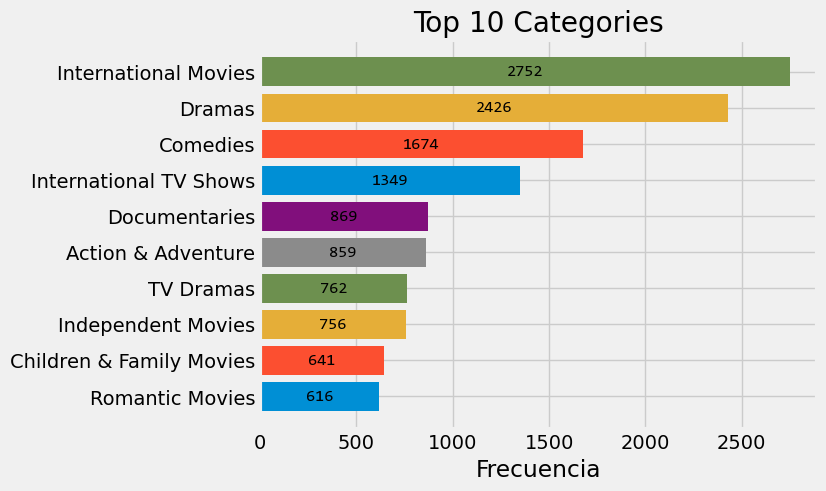

In [31]:
# Graficamos las 10 categorias más frecuentes
for i in top_10:
    fig = plt.barh(i[0], i[1])
    plt.bar_label(fig, label_type="center", size="12", family="consolas")

plt.title("Top 10 Categories")
plt.xlabel("Frecuencia")

plt.show()